In [33]:
from numpy import ones, linspace, sqrt, concatenate
from numpy.random import RandomState
from numpy_sugar.linalg import economic_qs, economic_qs_linear

In [34]:
from cellregmap import run_association, run_interaction, estimate_betas

In [1]:
random = RandomState(1)
n = 30                               # number of samples (cells)
p = 5                                # number of individuals
k = 4                                # number of contexts
y = random.randn(n, 1)               # outcome vector (expression phenotype, one gene only)
C = random.randn(n, k)               # context matrix (cells by contexts/factors)
W = ones((n, 1))                     # intercept (covariate matrix)
hK = random.randn(n, p)              # decomposition of kinship matrix (K = hK @ hK.T)
g = 1.0 * (random.rand(n, 1) < 0.2)  # SNP vector

In [20]:
import time
import matplotlib.pyplot as plt

In [2]:
############## Association Test

In [ ]:
###### Fit null model
# crm = CellRegMap(y=y, W=W, C=C, hK=hK)

In [14]:
start_time = time.time()
rhos = linspace(0, 1, 11)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0003185272216796875 seconds ---


In [54]:
rhos
rho = rhos[3]

In [55]:
a = sqrt(rho)
b = sqrt(1 - rho)
[a,b]

[0.5477225575051662, 0.8366600265340756]

In [56]:
start_time = time.time()
hS = concatenate([a * C] + [b * hK], axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0003058910369873047 seconds ---


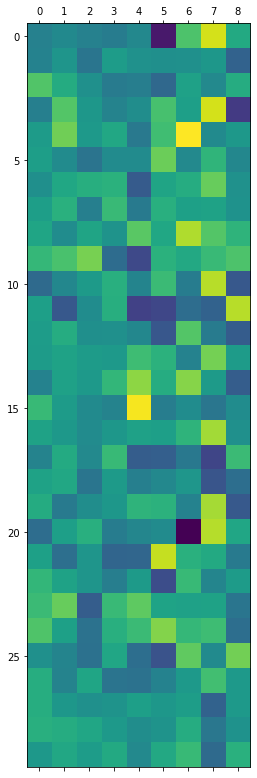

In [57]:
plt.matshow(hS)

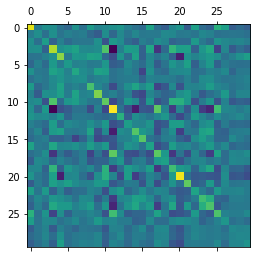

In [58]:
plt.matshow(hS @ hS.T)

In [59]:
# rank = 9: 4 contexts + 5 individuals
# n cells = 30
hS.shape

(30, 9)

In [60]:
S = hS @ hS.T
S.shape

(30, 30)

In [61]:
start_time = time.time()
QS = economic_qs_linear(hS, return_q1=False)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0005869865417480469 seconds ---


In [62]:
# eigenvectors
Q = QS[0][0]
Q.shape

(30, 9)

In [63]:
# eigenvalues
L = QS[1]
L.shape

(9,)

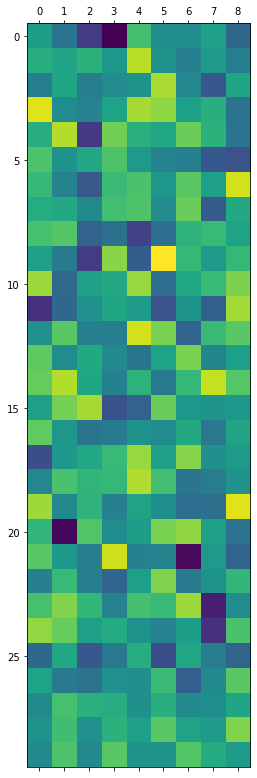

In [66]:
plt.matshow(Q)

In [ ]:
########################################## 

In [ ]:
############## Interaction Test

In [ ]:
###### Fit null model
# crm = CellRegMap(y=y, W=W, C=C, hK=hK)